In [1]:
#import all the packages
#load the gym library
import gym
import numpy as np
from numpy import linalg as L2

#creating the environment
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
#discountfactor
gamma = 0.9

In [2]:
#value iteration function
def value_iteration(env):
    max_iterations = 30
    #initialize state values
    value = np.zeros(16) 
    #initializing q values
    q_values = np.zeros((16,4))
    #next state values
    change = np.zeros((max_iterations))
    nextstatevalue = np.zeros(16) 
    #iterate through all the iterations
    for i in range(max_iterations):
        #iterate through all possible states
        for state in range(16):
            #actionvalues
            actionvalues = []  
            #iterate through all actions for each state
            for action in range(4):
                statevalue = 0
                for j in range(len(env.P[state][action])):
                    #obtain the prob distribution and reward from environment
                    prob, next_s, r, terminal = env.P[state][action][j]
                    #iteratively update values
                    value_stateaction = prob * (r + gamma*value[next_s])
                    statevalue = statevalue + value_stateaction
                q_values[state,action] = statevalue
                actionvalues.append(statevalue)
            idealaction = np.argmax(np.asarray(actionvalues))
            #obtain the next state value for max a belongs to A
            nextstatevalue[state] = actionvalues[idealaction]        
        #Change is used for the convergence plot
        change[i] = L2.norm(nextstatevalue - value)
        
        #To know when to break out
        if i > 1000 :
            if sum(value) - sum(nextstatevalue) < 1e-05:
                break
                print(i)
        else:
            value = nextstatevalue.copy()
    return value,change,q_values

In [3]:
#function to obtain the policy for the value obtained
def obtainpolicy(env, value):
    #initialize the fixed policy
    policy = [0 for i in range(16)]
    for state in range(16):
        actionvalues = []
        for action in range(4):
            actionvalue = 0
            for i in range(len(env.P[state][action])):
                prob, next_s, r, terminal = env.P[state][action][i]
                actionvalue += prob * (r + gamma * value[next_s])
            actionvalues.append(actionvalue)
        idealaction= np.argmax(np.asarray(actionvalues))
        #follow the same steps but obtain the policy from the best action taken
        policy[state] = idealaction

    return policy

In [4]:
#to visualize value iteration through heat maps
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value)
    print('Policy',policy)
    plt.show()



Value Function [0.06464143 0.05783154 0.07179787 0.05296771 0.0879758  0.
 0.11078945 0.         0.14227368 0.24534255 0.29810017 0.
 0.         0.37836242 0.63818919 0.        ]
Policy [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


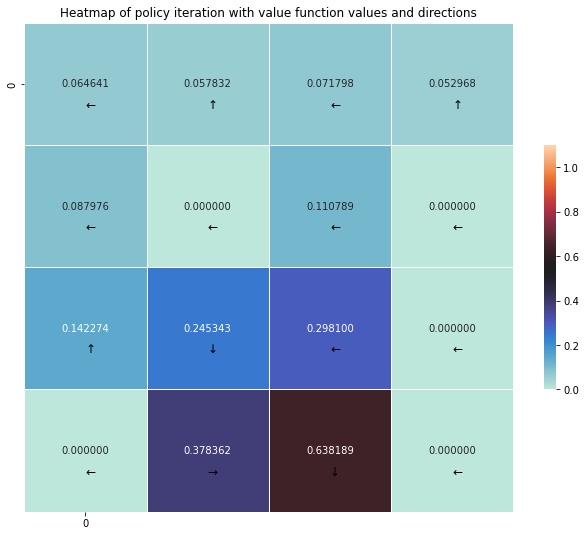

In [5]:
#Obtaining the value function, policy and visualizing the heat map for value iteration
value,change,q_values = value_iteration(env)
policy = obtainpolicy(env,value)
fancy_visual(value,policy)

Text(0, 0.5, 'Difference showing ||Vk - Vk-1||')

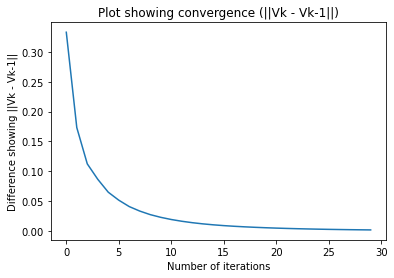

In [6]:
#plot of convergence
plt.plot(change)
plt.title('Plot showing convergence (||Vk - Vk-1||)')
plt.xlabel('Number of iterations')
plt.ylabel('Difference showing ||Vk - Vk-1||')        

        
        
        


In [7]:
#optimal q-value
optimal_qvalue = []
for i in range(16):
    optimal_qvalue.append(np.max(q_values[i]))
    
print("Optimal Q-function :", optimal_qvalue)

Optimal Q-function : [0.0646414302864638, 0.05783153713008355, 0.07179787337666477, 0.05296771151516737, 0.08797580342316857, 0.0, 0.11078944552009982, 0.0, 0.14227367644592215, 0.24534254946328704, 0.2981001729126293, 0.0, 0.0, 0.3783624192225497, 0.6381891920563134, 0.0]
